# Knock airport Weather

From the data set of the following link: https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv This program plot:
- The temperature
- The mean temperature each day
- The mean temperature for each month
- The Windspeed (considering there is data missing from this column)
- The rolling windspeed (say over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max windspeeds (yer I am being nasty here)


In [8]:
# Import pandas library
import pandas as pd

In [9]:
# Import matplotlib.pyplot library
import matplotlib.pyplot as plt

In [10]:
import datetime as dt
print(dir(dt))

['MAXYEAR', 'MINYEAR', 'UTC', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'date', 'datetime', 'datetime_CAPI', 'time', 'timedelta', 'timezone', 'tzinfo']


As the csv file has 23 lines that are not common in a csv file and this cause issues, we can 'ignore' them, with the "skip" method:
Source: https://www.geeksforgeeks.org/python/how-to-skip-rows-while-reading-csv-file-using-pandas/

In [11]:
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"

df = pd.read_csv(url, skiprows=range(0, 23))  # don't take in consideration the first 20 lines
df.head()

C:\Users\tanya\AppData\Local\Temp\ipykernel_9476\2468379064.py:3: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=range(0, 23))  # don't take in consideration the first 20 lines


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [12]:
# As date is in text format, we need to convert it to datetime format
# source: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
print(df.head())

C:\Users\tanya\AppData\Local\Temp\ipykernel_9476\3415753099.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], dayfirst=True)


                 date  ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  rhum  \
0 1996-04-10 14:00:00    0  0.0      0  11.5      0   8.1    3.9    0.0     0   
1 1996-07-31 08:00:00    0  0.0      0  11.5      0  11.1   10.7    0.0     0   
2 1996-07-31 09:00:00    0  0.0      0  11.6      0  10.7    9.8    0.0     0   
3 1996-07-31 10:00:00    0  0.0      0  12.9      0  11.3    9.8    0.0     0   
4 1996-07-31 11:00:00    0  0.0      0  14.5      0  10.8    7.0    0.0     0   

   ... ind.3  wdsp ind.4  wddir  ww   w  sun    vis clht clamt  
0  ...     0     0     0      0  25  81  0.0  35000   32     5  
1  ...     0     0     0      0  25  82  0.0  40000   45     5  
2  ...     0     0     0      0  80  81  0.0   8000   32     7  
3  ...     0     0     0      0  25  82  0.0  28000   35     6  
4  ...     0     0     0      0   2  11  0.0  40000   40     6  

[5 rows x 21 columns]


## Plot the tempeture
We need to import matplotlib to create the plotes.

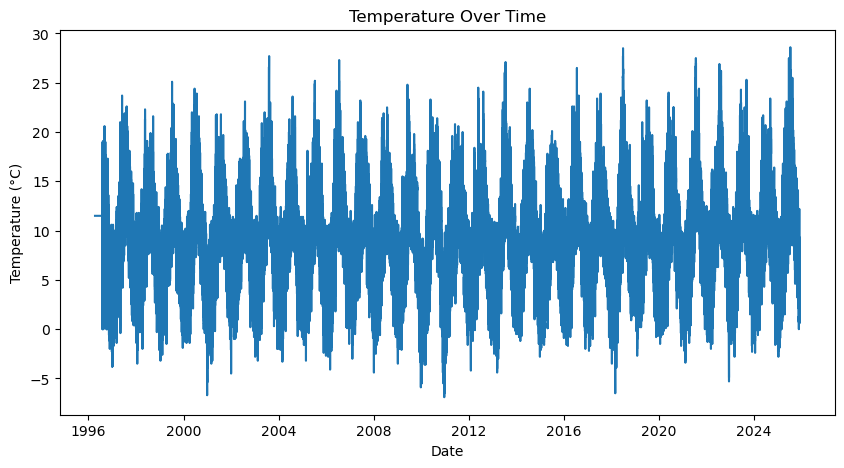

In [13]:
# create a plot of temperature over time

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['temp'])
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.show()